# Lecture (7): The Ising Model

Suppose we have a square lattice where each site $i$ has a spin $s_i = \pm 1$, representing an atom whose magnetic field is pointed up or down. Each spin interacts with its neighbors, giving the system an overall energy

$$E = - \sum_{ij} s_i s_j,$$

where the sum is over pairs of sites $i,j$ that are nearest neighbors. If we just want to minimize $E$, we can point the spins in the same direction (ferromagnetic model). But system is not always in its lowest energy state --- depending on the temperature, its energy is sometimes higher. According to the _Boltzmann distribution_, the equilibrium probability $P_{eq}(s)$ that a system is in a given state $s$

$$P_{eq}(s) \propto e^{-\beta E(s)}, \quad \text{where } \beta = 1/T$$

and $E(s)$ is an energy of a state $s$. If $T \rightarrow 0, \; \beta \rightarrow \infty$ and $P_{eq}(s)$ is non-zero only for the lowest energy states. In the opposite case $T \rightarrow \infty, \; \beta \rightarrow 0$ and all states are equally likely.

Let us lump states with the same energy together into _macrostates_. Then the total probability of being in a macrostate with energy $E$ is proportional to

$$W e^{-\beta E} = e^{S- \beta E} = e^{-\beta (E-TS)},$$

where $W$ is the number of states in that macrostate. $S = \log W$ is called the entropy. The likeliest macrostate minimizes the free energy $E-TS$.

Now suppose that we want to generate a random state of the Ising model according to the Boltzmann distribution (to estimate some physical quantity $X$ by generating a large number of such states). A naive approach would be to use _rejection sampling_, i.e. setting each spin randomly with equal probability, calculate the energy $E$ of this state and then accept it as a sample with probability $P=e^{-\beta (E - E_{min})}$ (we substract $E_{min}$, so $P \leq 1$). However, for almost all states $P$ is exponentially small, so we would have to generate an exponential number of trial states. It would be much better **to take the Boltzmann factor into acoount during the process of constructing each state**.

## Metropolis-Hastings (Glauber) dynamics

We start from initial state (e.g. all spins pointed up or all spins are random) and then perform a random walk in state space, flipping one spin at a time. By defining probabilities of these flips in the right way, we can guarantee that the resulting state will be chosen according to the Boltzmann distribution (after a sufficient time).

At each step we choose the random site $i$ and consider what change $\Delta E$ in the energy would result if we flipped $s_i$. Then we flip $s_i$ with the following probability:

$$ p(\text{flip}) = \begin{cases}
   1 &\text{if $\Delta E < 0$}\\
   e^{-\beta \Delta E} &\text{if $\Delta E \geq 0$.}
 \end{cases} $$
 
 _**Discuss detailed balance!**_

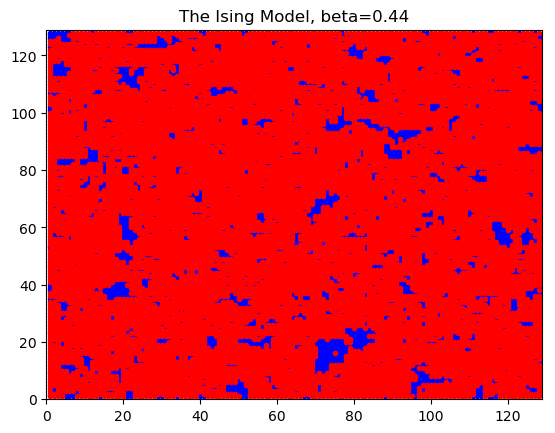

PyObject <matplotlib.text.Text object at 0x7f1de9605fd0>

In [1]:
using PyPlot

x_p = Float64[] # For scatter plot
y_p = Float64[]
x_m = Float64[]
y_m = Float64[]

L = 128 # square lattice LxL
Time = 1000000 # number of steps
beta = 0.44 # 1/T, critical value = 0.44

sample = ones(L,L) # initial sample

function elem(p, q) # periodic boundary condition
    if p==0
        p=L
    elseif p==L+1
        p=1            
    end
        
    if q==0
        q=L
    elseif q==L+1
        q=1
    end
            
    return sample[p,q]    
end

function delta_E(i, j) # computing delta_E
    return 2*sample[i,j]*(elem(i-1,j)+elem(i+1,j)+elem(i,j-1)+elem(i,j+1)) 
end

for t in 1:Time
            
    i = rand(1:L)
    j = rand(1:L)
    dE = delta_E(i,j) 
    
    if dE<0
        sample[i,j]=-sample[i,j]
    else
                Upsilon = exp(-beta*dE)
                if rand()<Upsilon
                    sample[i,j]=-sample[i,j]
                end                
    end   
end

for i in 1:L
    for j in 1:L
    
        if sample[i,j]==1
            push!(x_p, i)
            push!(y_p, j)
        else
            push!(x_m, i)
            push!(y_m, j)
        end    
        
    end
end

PyPlot.axis([0, L+1, 0, L+1])
PyPlot.plot(x_m,y_m,"bo",markersize=3)
PyPlot.plot(x_p,y_p,"ro",markersize=3)
PyPlot.title("The Ising Model, beta=0.44")